# Logistic Regression

In [ ]:
import numpy as np
from Scratch.helpers.MathFunctions import logistic

class LogisticRegressor:
    def __init__(self, lr=0.01, n_iters=1000, thres=0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None
        self.thres = thres
    
    def __call__(self, instances):
        return self.predict(instances)
    
    def fit(self, X, y):
        num_obvs, self.num_features = X.shape
        self.theta = np.random.random((self.num_features+1,))
        
        for _ in range(self.n_iters):
            for features, label in zip(X, y):
                _, probs = self([features])
                proba = probs[0]
                theta_update = self.get_theta_update(proba, label, features)
                self.theta -= self.lr * theta_update
                
    def predict(self, instances, outs="hard"):
        preds = []
        probs = []
        for instance in instances:
            proba = self.theta.dot(np.append(instance, 1))
            proba = logistic(proba)
            pred = 0
            if proba > self.thres:
                pred = 1
            probs.append(proba)
            preds.append(pred)
        return np.array(preds), np.array(probs)

    def get_theta_update(self, proba, label, features):
        theta_update = np.full((self.num_features+1,), (proba - label))
        theta_update = theta_update*np.append(features, 1)
        return theta_update

## Logistic Regression Classifier

In [1]:
from Scratch.LogisticRegression import LogisticRegressor

In [2]:
from Scratch.helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split()

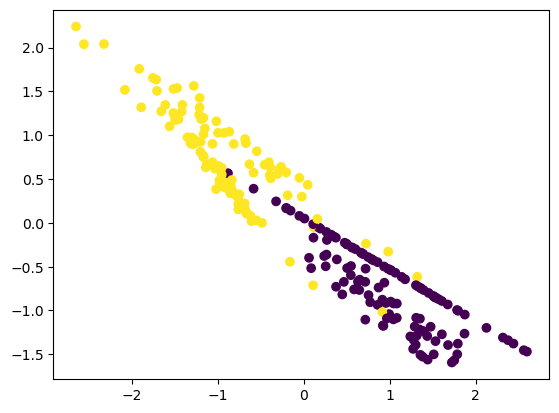

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [4]:
model = LogisticRegressor()
model.fit(X_train, y_train)
preds, probs = model(X_test)

In [5]:
from Scratch.helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

{'acc': 0.9, 'precision': 0.90625, 'recall': 0.90625}

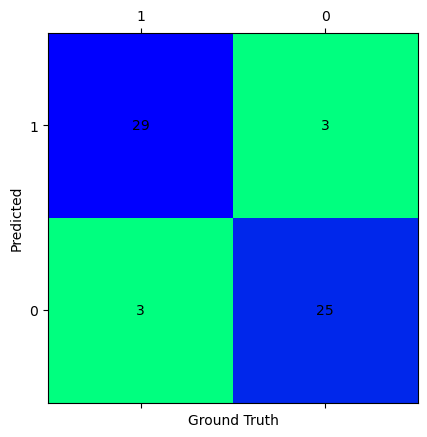

In [6]:
from Scratch.helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)